Feature Engineering

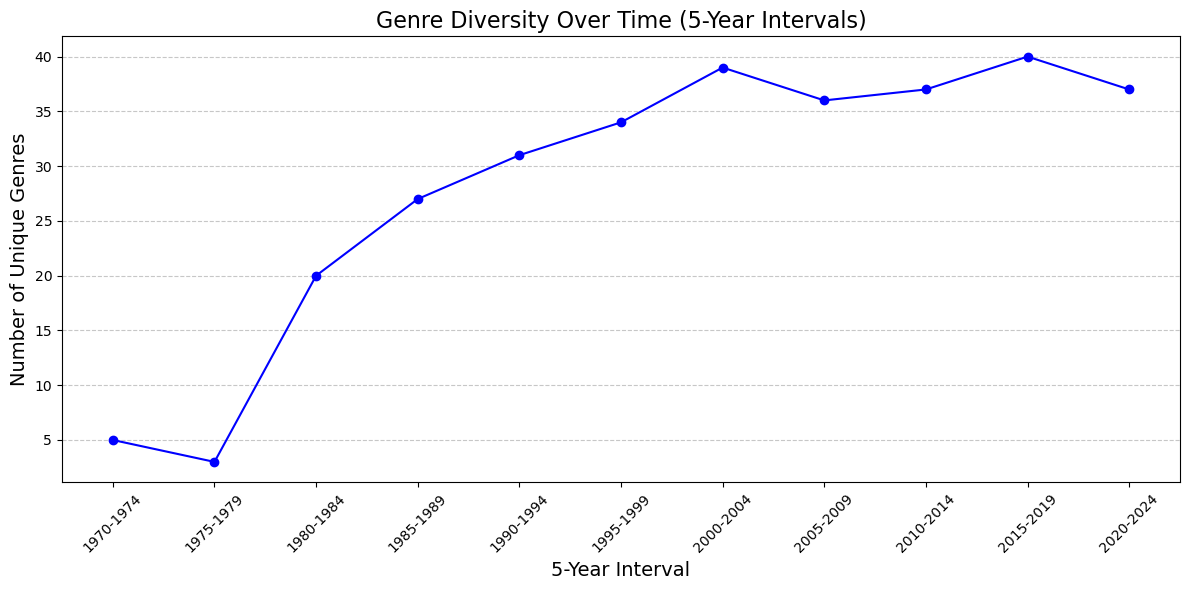

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the aggregated genre trends dataset
file_path = "genre_trends_aggregated.csv"
df = pd.read_csv(file_path)

# Define a function to map release_year into 5-year intervals
def map_to_interval(year):
    if pd.isna(year):  # Skip NaN years
        return None
    start_year = (int(year) // 5) * 5  # Find the start of the 5-year bin
    end_year = start_year + 4 if start_year + 4 <= 2024 else 2024
    return f"{start_year}-{end_year}"

# Apply the mapping to create a new column for 5-year bins
df['release_interval'] = df['release_year'].apply(map_to_interval)

# Group by the 5-year interval and calculate unique genres per interval
genre_diversity = df.groupby('release_interval')['genre'].nunique().reset_index()
genre_diversity.columns = ['release_interval', 'unique_genres']

# Sort the intervals chronologically
genre_diversity['release_interval'] = pd.Categorical(
    genre_diversity['release_interval'],
    ordered=True,
    categories=sorted(genre_diversity['release_interval'].unique())
)
genre_diversity = genre_diversity.sort_values('release_interval')

# Plot the genre diversity over time (Line Chart)
plt.figure(figsize=(12, 6))
plt.plot(genre_diversity['release_interval'], genre_diversity['unique_genres'], marker='o', linestyle='-', color='b')

# Add labels and titles
plt.title('Genre Diversity Over Time (5-Year Intervals)', fontsize=16)
plt.xlabel('5-Year Interval', fontsize=14)
plt.ylabel('Number of Unique Genres', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

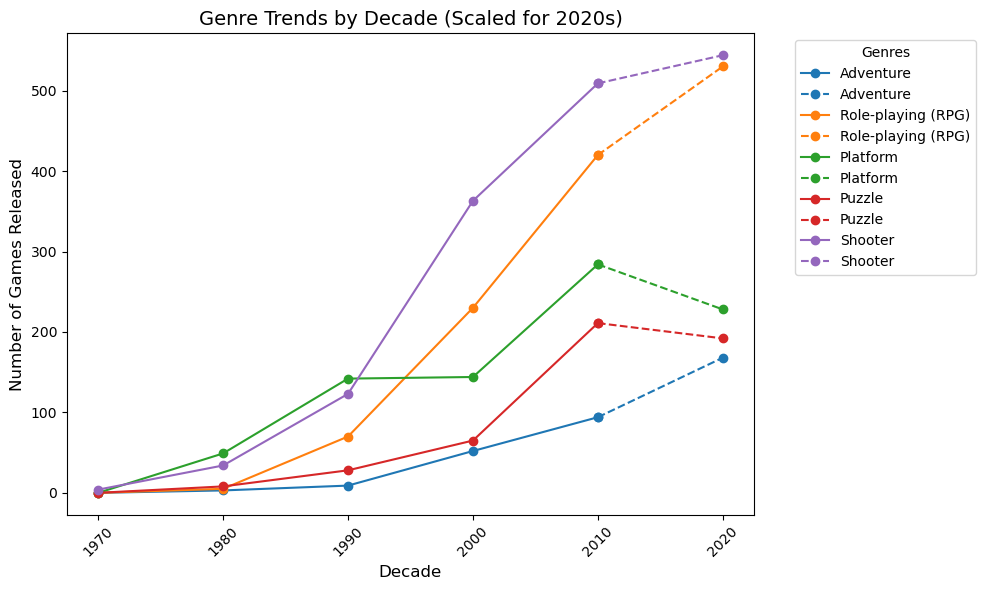

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the scaled data
df = pd.read_csv('genre_trends_by_decade_scaled.csv')

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Iterate through each genre and plot its trends over the decades
for index, row in df.iterrows():
    genre = row['genre']
    
    # Plot the data for all decades before 2020 with solid lines
    plt.plot(df.columns[1:6], row[1:6], marker='o', label=genre)
    
    # Plot the data for the 2020 decade with a dashed line (same color as the previous line)
    plt.plot(df.columns[5:], row[5:], marker='o', linestyle='--', color=plt.gca().lines[-1].get_color(), label=genre)

# Set plot labels and title
plt.title('Genre Trends by Decade (Scaled for 2020s)', fontsize=14)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Number of Games Released', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

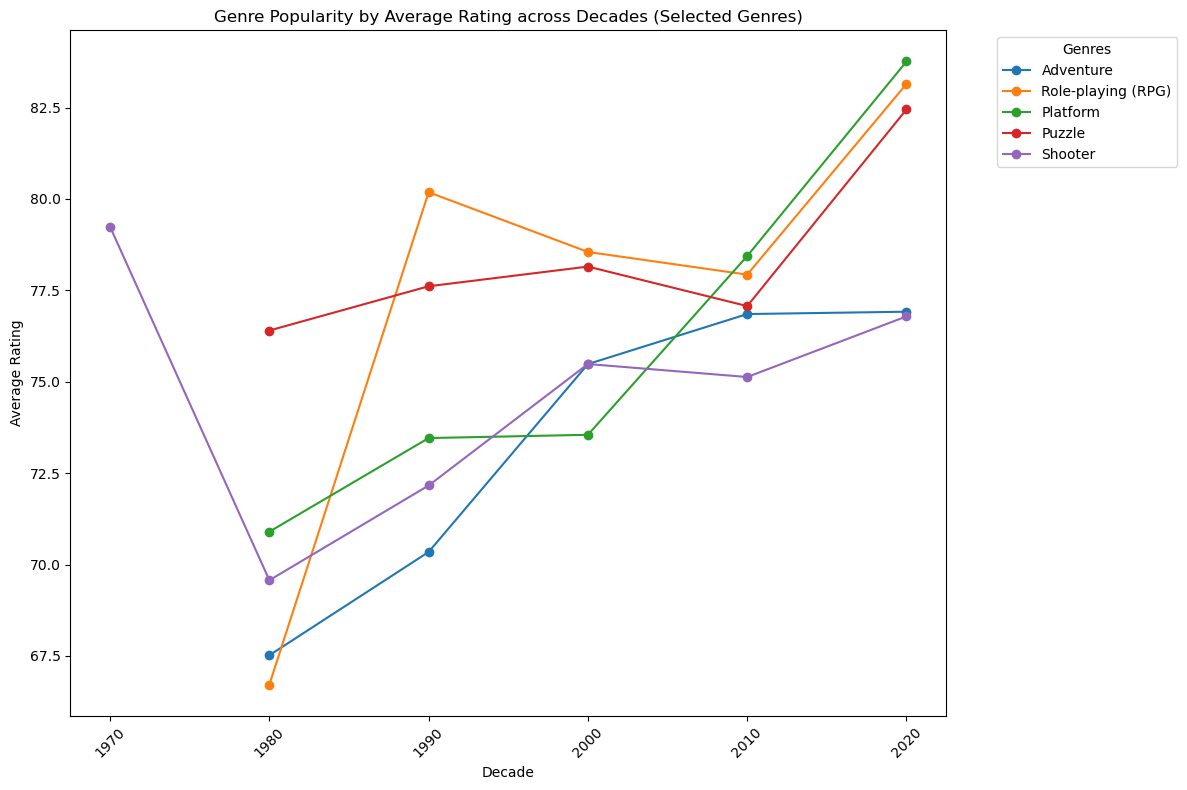

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the genre trends data
df = pd.read_csv('genre_trends_with_decade.csv')

# Fill missing avg_rating values with the mean of avg_rating for each genre
df['avg_rating'] = df.groupby('genre')['avg_rating'].transform(lambda x: x.fillna(x.mean()))

# Calculate the average rating by genre and decade
avg_rating_by_genre_decade = df.groupby(['genre', 'release_decade'])['avg_rating'].mean().reset_index()

# Create a pivot table to display genres by decades
pivot_df = avg_rating_by_genre_decade.pivot(index='release_decade', columns='genre', values='avg_rating')

# List of selected genres for plotting
selected_genres = ['Adventure', 'Role-playing (RPG)', 'Platform', 'Puzzle', 'Shooter']

# Filter the pivot table to include only the selected genres
pivot_df_selected = pivot_df[selected_genres]

# Plot the trends of average ratings over the decades for selected genres
plt.figure(figsize=(12, 8))

# Plot each selected genre's rating trend across decades
for genre in pivot_df_selected.columns:
    plt.plot(pivot_df_selected.index, pivot_df_selected[genre], marker='o', label=genre)

# Add labels and title
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.title('Genre Popularity by Average Rating across Decades (Selected Genres)')
plt.xticks(pivot_df_selected.index, rotation=45)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

Game Engine Preferences by Genre

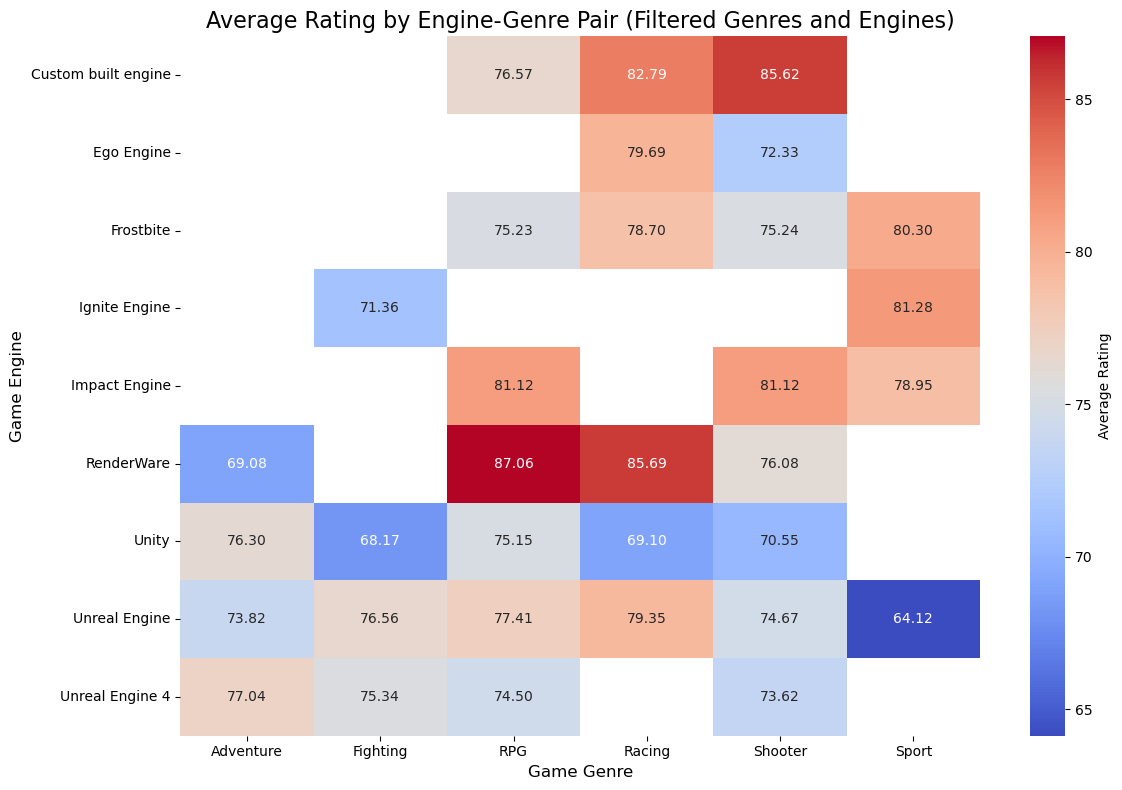

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the analysis2.csv file
df = pd.read_csv('analysis2_updated.csv')

# Ensure there are no missing ratings
df = df.dropna(subset=['aggregated_rating'])

# List of selected genres and selected engines
selected_genres = ['RPG', 'Fighting', 'Shooter', 'Adventure', 'Racing', 'Sport']
selected_engines = ['Unity', 'Unreal Engine 4', 'Unreal Engine', 'Ego Engine', 
                    'Custom built engine', 'RenderWare', 'Ignite Engine', 
                    'Frostbite', 'Impact Engine']

# Filter the dataframe for selected genres and engines
filtered_df = df[df['genre_labels'].isin(selected_genres) & df['engine_used'].isin(selected_engines)]

# Group by genre and engine, then calculate the mean aggregated_rating
engine_genre_avg_rating = filtered_df.groupby(['genre_labels', 'engine_used'])['aggregated_rating'].mean().reset_index()

# Create a pivot table to get the ratings per engine-genre pair
rating_pivot = engine_genre_avg_rating.pivot(index='engine_used', columns='genre_labels', values='aggregated_rating')

# Plot the heatmap for the engine-genre average ratings
plt.figure(figsize=(12, 8))
sns.heatmap(rating_pivot, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Average Rating'})
plt.title('Average Rating by Engine-Genre Pair (Filtered Genres and Engines)', fontsize=16)
plt.xlabel('Game Genre', fontsize=12)
plt.ylabel('Game Engine', fontsize=12)
plt.tight_layout()
plt.show()

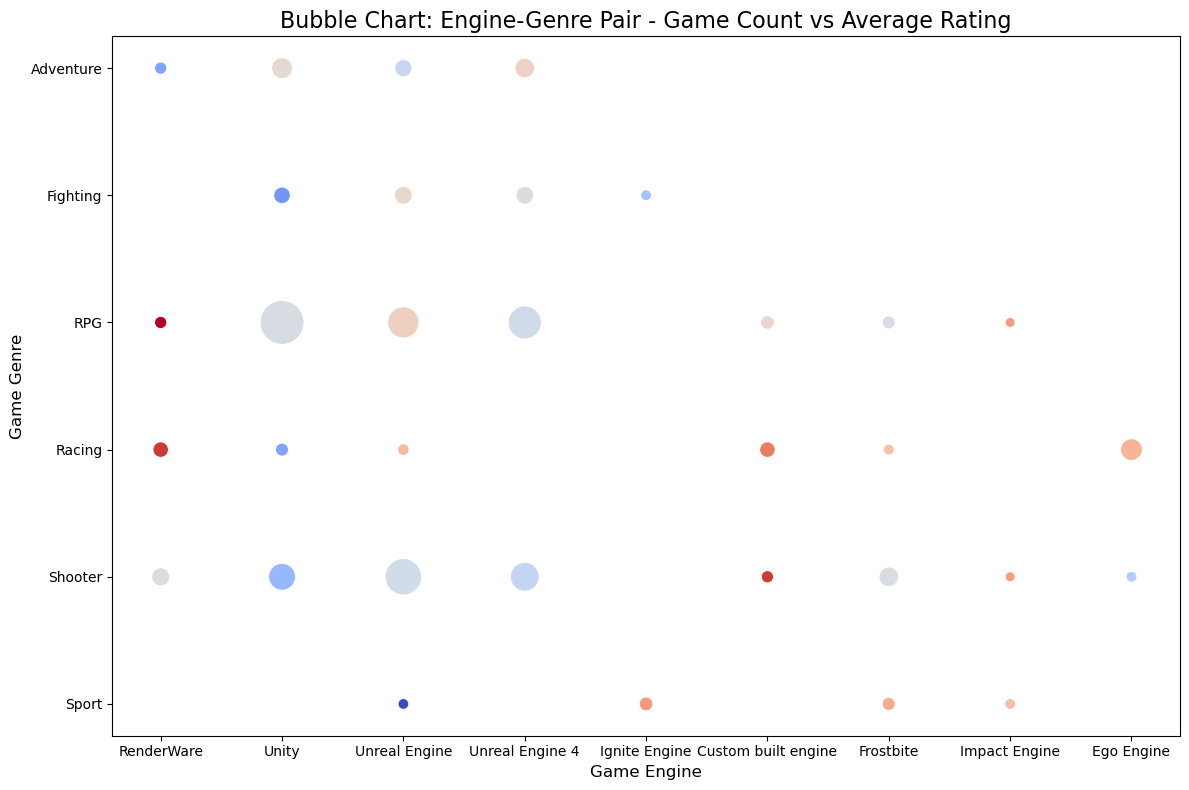

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the analysis2.csv file
df = pd.read_csv('analysis2_updated.csv')

# List of selected genres and selected engines
selected_genres = ['RPG', 'Fighting', 'Shooter', 'Adventure', 'Racing', 'Sport']
selected_engines = ['Unity', 'Unreal Engine 4', 'Unreal Engine', 'Ego Engine', 
                    'Custom built engine', 'RenderWare', 'Ignite Engine', 
                    'Frostbite', 'Impact Engine']

# Filter the dataframe for selected genres and engines
filtered_df = df[df['genre_labels'].isin(selected_genres) & df['engine_used'].isin(selected_engines)]

# Group by genre and engine, then calculate the mean aggregated_rating and count of games
engine_genre_stats = filtered_df.groupby(['genre_labels', 'engine_used']).agg(
    avg_rating=('aggregated_rating', 'mean'),
    game_count=('aggregated_rating', 'size')
).reset_index()

# 1. Bubble Chart: Engine-Genre Pair with Number of Games and Average Rating

plt.figure(figsize=(12, 8))

# Scatter plot with bubble sizes
sns.scatterplot(data=engine_genre_stats, x='engine_used', y='genre_labels', 
                size='game_count', hue='avg_rating', palette='coolwarm', 
                sizes=(50, 1000), legend=None, marker='o')

# Customize plot appearance
plt.title('Bubble Chart: Engine-Genre Pair - Game Count vs Average Rating', fontsize=16)
plt.xlabel('Game Engine', fontsize=12)
plt.ylabel('Game Genre', fontsize=12)
plt.tight_layout()
plt.show()

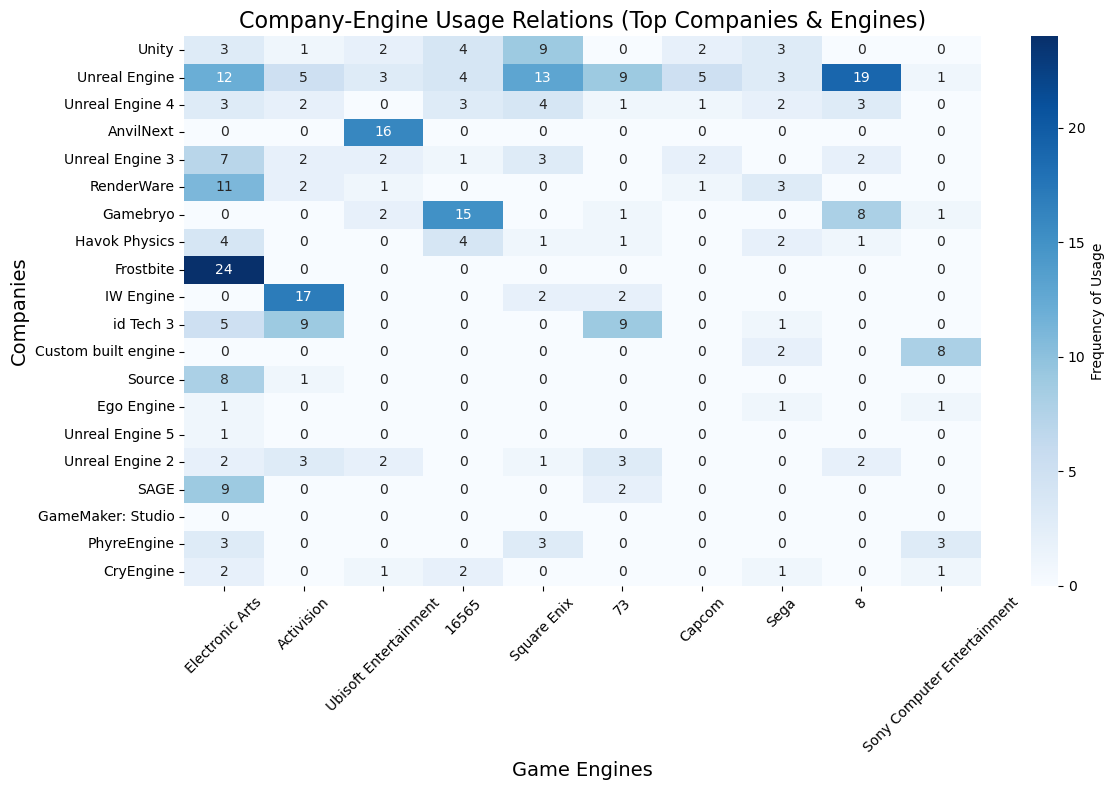

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
df = pd.read_csv("all_games.csv")
engine_info = pd.read_csv("engine_info.csv")  # Engine info mapping
company_id_mapping = pd.read_csv("company_id_mapping.csv")  # Company ID mapping

# Create a dictionary for engine ID to engine name mapping
engine_mapping = dict(zip(engine_info['engine_id'], engine_info['engine_name']))

# Create a dictionary for company ID to company name mapping
company_mapping = dict(zip(company_id_mapping['id'], company_id_mapping['name']))

# Replace engine IDs with engine names
df['game_engines'] = df['game_engines'].apply(lambda x: [engine_mapping.get(int(engine.strip()), engine.strip()) for engine in x.split(",")] if isinstance(x, str) else [])

# Replace company IDs with company names
df['involved_companies'] = df['involved_companies'].apply(lambda x: [company_mapping.get(int(company.strip()), company.strip()) for company in x.split(",")] if isinstance(x, str) else [])

# Initialize a dictionary to store company-engine relationships
company_engine_count = {}

# Loop through each row and update the company-engine count
for _, row in df.iterrows():
    companies = row['involved_companies']
    engines = row['game_engines']
    for company in companies:
        for engine in engines:
            # Use strip to remove any extra spaces
            company = company.strip()
            engine = engine.strip()
            if company and engine:  # Check for non-empty values
                if company not in company_engine_count:
                    company_engine_count[company] = {}
                if engine not in company_engine_count[company]:
                    company_engine_count[company][engine] = 0
                company_engine_count[company][engine] += 1

# Convert the company-engine count dictionary into a DataFrame
company_engine_df = pd.DataFrame(company_engine_count).fillna(0)

# Limit the matrix size by selecting the top N companies and engines
top_n_companies = 20  # Number of top companies to include
top_n_engines = 10    # Number of top engines to include

# Sort companies and engines by their total usage
company_usage = company_engine_df.sum(axis=1).sort_values(ascending=False).head(top_n_companies)
engine_usage = company_engine_df.sum(axis=0).sort_values(ascending=False).head(top_n_engines)

# Filter the company-engine DataFrame for top N companies and engines
filtered_df = company_engine_df.loc[company_usage.index, engine_usage.index]

# Plot the heatmap for the filtered company-engine matrix
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Frequency of Usage'})
plt.title('Company-Engine Usage Relations (Top Companies & Engines)', fontsize=16)
plt.xlabel('Game Engines', fontsize=14)
plt.ylabel('Companies', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
import pandas as pd

# Load the dataset
df = pd.read_csv('games_with_temporal_features.csv')

# Step 1: Create flags for localization to Japan, Europe, and Korea
df['localized_japan'] = df['game_localizations'].apply(lambda x: 1 if '3' in str(x) else 0)
df['localized_europe'] = df['game_localizations'].apply(lambda x: 1 if '4' in str(x) else 0)
df['localized_korea'] = df['game_localizations'].apply(lambda x: 1 if '2' in str(x) else 0)

# Step 2: Categorize localization based on num_localizations
df['localization_category'] = df['num_localizations'].apply(
    lambda x: 'None' if x == 0 else ('Minimal' if x <= 2 else 'Extensive')
)

# Check for any missing values in num_localizations and handle them if necessary
df['num_localizations'].fillna(0, inplace=True)

# Step 3: Create a final dataset with necessary columns for analysis
df_analysis = df[['name', 'aggregated_rating', 'rating_count', 'num_localizations', 'game_localizations',
                  'localized_japan', 'localized_europe', 'localized_korea', 'localization_category']]

# Save the prepared dataset to a new CSV for analysis
df_analysis.to_csv('prepared_localization_analysis.csv', index=False)

# Output a preview of the prepared data
#df_analysis.head()

/tmp/ipykernel_617/3020132652.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['num_localizations'].fillna(0, inplace=True)


/tmp/ipykernel_617/3002043212.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis['localization_category'] = df_analysis['num_localizations'].apply(categorize_localizations)
/tmp/ipykernel_617/3002043212.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='localization_category', y='aggregated_rating', data=df_analysis, palette='Set2')


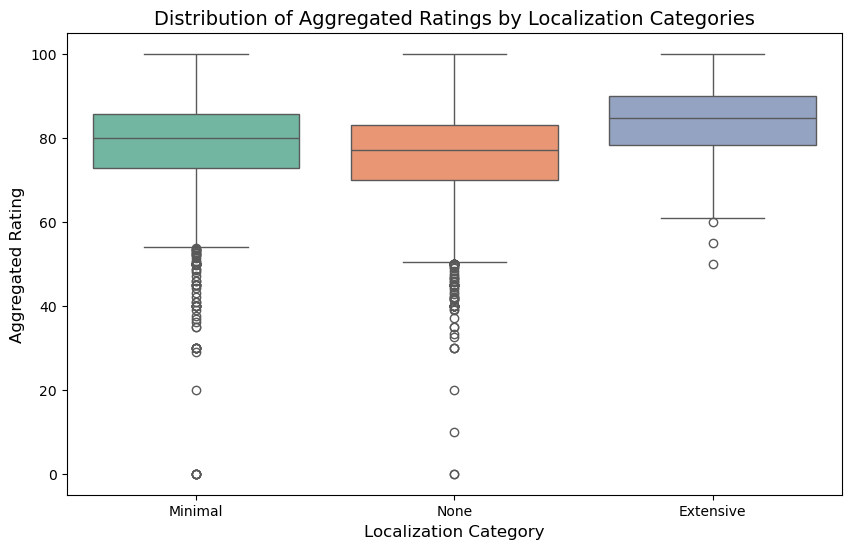

In [8]:
# Create localization categories
def categorize_localizations(num_localizations):
    if num_localizations == 0:
        return 'None'
    elif 1 <= num_localizations <= 2:
        return 'Minimal'
    else:
        return 'Extensive'

# Apply the categorization
df_analysis['localization_category'] = df_analysis['num_localizations'].apply(categorize_localizations)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='localization_category', y='aggregated_rating', data=df_analysis, palette='Set2')

# Add titles and labels
plt.title('Distribution of Aggregated Ratings by Localization Categories', fontsize=14)
plt.xlabel('Localization Category', fontsize=12)
plt.ylabel('Aggregated Rating', fontsize=12)

# Show the plot
plt.show()

In [9]:
import pandas as pd

# Load the dataset
df = pd.read_csv('exploded_games_with_localizations.csv')

# Company ID to Company Name mapping
company_id_to_name = {
    70: 'Nintendo',
    1: 'Electronic Arts',
    26: 'Square Enix',
    112: 'Sega',
    104: 'Ubisoft Entertainment',
    37: 'Capcom',
    129: 'Konami',
    13634: 'Sony Computer Entertainment'
}

# Filter for specific company_ids
company_ids = list(company_id_to_name.keys())
df_filtered = df[df['company_id'].isin(company_ids)]

# Group by company_id and num_localizations, then calculate the mean aggregated_rating
avg_ratings = df_filtered.groupby(['company_id', 'num_localizations'])['aggregated_rating'].mean().reset_index()

# Now print the results for each company, where num_localizations = 0, 1, 2, 3
for company_id in company_ids:
    company_name = company_id_to_name[company_id]  # Get company name from ID
    print(f"Company: {company_name}")
    for loc in range(4):  # Assuming num_localizations takes values 0, 1, 2, 3
        avg_rating = avg_ratings[(avg_ratings['company_id'] == company_id) & (avg_ratings['num_localizations'] == loc)]['aggregated_rating']
        if not avg_rating.empty:
            print(f"  num_localizations = {loc}: Average Aggregated Rating = {avg_rating.iloc[0]:.2f}")
        else:
            print(f"  num_localizations = {loc}: No data")
    print("\n")

Company: Nintendo
  num_localizations = 0: Average Aggregated Rating = 76.12
  num_localizations = 1: Average Aggregated Rating = 76.86
  num_localizations = 2: Average Aggregated Rating = 81.67
  num_localizations = 3: Average Aggregated Rating = 83.77


Company: Electronic Arts
  num_localizations = 0: Average Aggregated Rating = 73.55
  num_localizations = 1: Average Aggregated Rating = 76.27
  num_localizations = 2: Average Aggregated Rating = 80.26
  num_localizations = 3: Average Aggregated Rating = 64.00


Company: Square Enix
  num_localizations = 0: Average Aggregated Rating = 79.80
  num_localizations = 1: Average Aggregated Rating = 73.16
  num_localizations = 2: Average Aggregated Rating = 80.54
  num_localizations = 3: Average Aggregated Rating = 84.50


Company: Sega
  num_localizations = 0: Average Aggregated Rating = 78.53
  num_localizations = 1: Average Aggregated Rating = 71.24
  num_localizations = 2: Average Aggregated Rating = 80.00
  num_localizations = 3: Averag

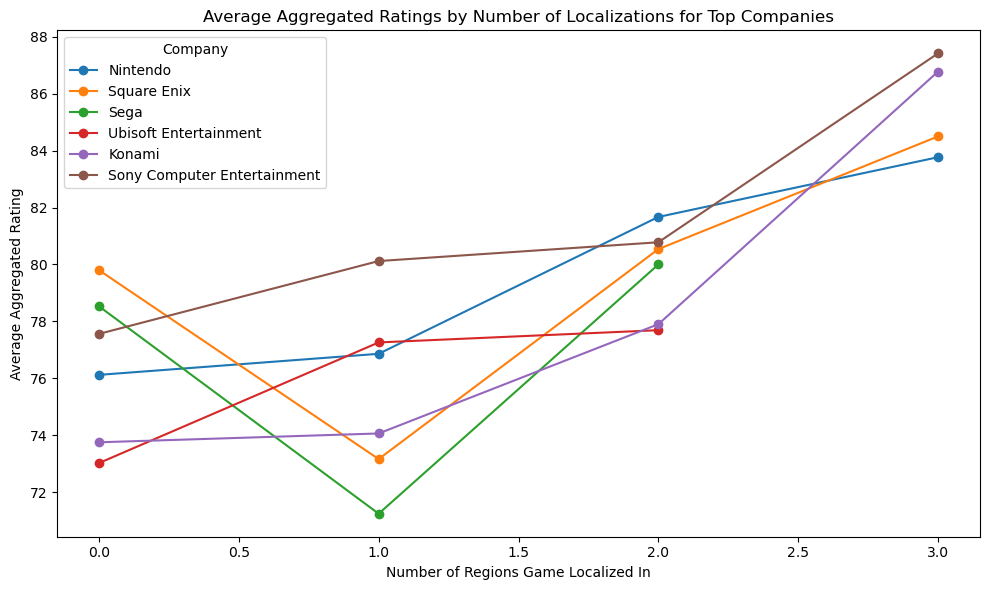

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data
companies = ['Nintendo', 'Square Enix', 'Sega', 
             'Ubisoft Entertainment', 'Konami', 'Sony Computer Entertainment']
num_localizations = [0, 1, 2, 3]
ratings = {
    'Nintendo': [76.12, 76.86, 81.67, 83.77],
    'Square Enix': [79.80, 73.16, 80.54, 84.50],
    'Sega': [78.53, 71.24, 80.00, np.nan],
    'Ubisoft Entertainment': [73.02, 77.26, 77.69, np.nan],
    'Konami': [73.75, 74.06, 77.90, 86.78],
    'Sony Computer Entertainment': [77.56, 80.12, 80.78, 87.42]
}

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each company's data
for company in companies:
    ax.plot(num_localizations, ratings[company], marker='o', label=company)

# Set labels and title
ax.set_xlabel('Number of Regions Game Localized In')
ax.set_ylabel('Average Aggregated Rating')
ax.set_title('Average Aggregated Ratings by Number of Localizations for Top Companies')
ax.legend(title='Company')

# Show plot
plt.tight_layout()
plt.show()